In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = 'simulation_num_uavs'
file_name = 'both'
file = str(folder+'/'+file_name+'.txt')
df = pd.read_csv(file, delimiter = ",")

In [3]:
df.head()

,exec_time,NUM_UAVS,MODE,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
0,12382.23,2,unique,False,284,95.04,6.01,56.8
1,12411.37,2,unique,False,293,95.00,6.04,58.6
2,12436.43,2,unique,False,267,95.16,5.95,53.4
3,12469.42,2,unique,False,292,95.00,6.05,58.4
4,12500.75,2,unique,False,364,95.08,5.99,72.8


In [4]:
unique = df[df['MODE']=='unique']
continuous = df[df['MODE']=='continuous']
unique_avg = unique.groupby('NUM_UAVS').mean()
continuous_avg = continuous.groupby('NUM_UAVS').mean()

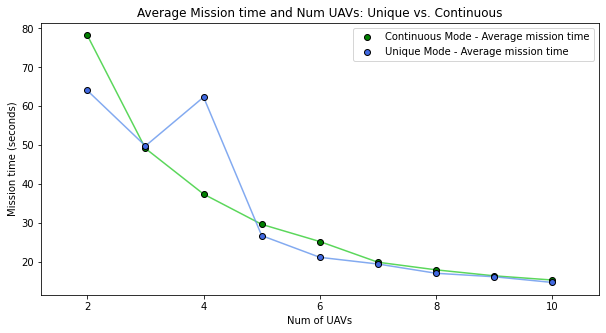

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

plt.figure(figsize=(10, 5))

x = np.array(continuous_avg.index, dtype=np.float64)
y = np.array(continuous_avg['mission_time'], dtype=np.float64)

min_x = np.min(x)
max_x = np.max(x)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y


# Mission time plot - averages comparison
plt.title("Average Mission time and Num UAVs: Unique vs. Continuous")
plt.xlabel("Num of UAVs")
plt.ylabel("Mission time (seconds)")
plt.scatter(continuous_avg.index, continuous_avg['mission_time'],
                  color='green', alpha=1, edgecolor='black', zorder=2,
                  label='Continuous Mode - Average mission time')
plt.plot(continuous_avg.index, continuous_avg['mission_time'], color='limegreen', alpha=0.8, zorder=1)
plt.scatter(unique_avg.index, unique_avg['mission_time'],
                  color='royalblue', alpha=1, edgecolor='black', zorder=2,
                  label='Unique Mode - Average mission time')
plt.plot(unique_avg.index, unique_avg['mission_time'], color='cornflowerblue', alpha=0.8, zorder=1)

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.legend()


plt.savefig('coverage-comparison-avg-uavs.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

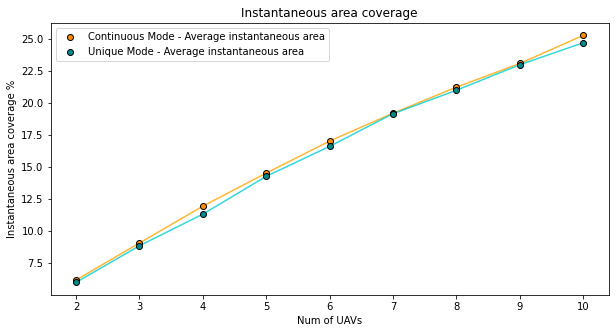

In [6]:
plt.figure(figsize=(10, 5))

plt.title("Instantaneous area coverage")
plt.xlabel("Num of UAVs")
plt.ylabel("Instantaneous area coverage %")

# Avg instantaneous coverage plot - averages
plt.scatter(continuous_avg.index, continuous_avg['average_inst_cov_area'], color='darkorange',
            alpha=1, edgecolor='black', zorder=3, label="Continuous Mode - Average instantaneous area")
plt.plot(continuous_avg.index, continuous_avg['average_inst_cov_area'], color='orange', alpha=0.8, zorder=2)
plt.scatter(unique_avg.index, unique_avg['average_inst_cov_area'], color='darkcyan',
            alpha=1, edgecolor='black', zorder=3, label="Unique Mode - Average instantaneous area")
plt.plot(unique_avg.index, unique_avg['average_inst_cov_area'], color='darkturquoise', alpha=0.8, zorder=2)

plt.legend()
plt.savefig('coverage-comparison-inst.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


/home/miquel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/miquel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


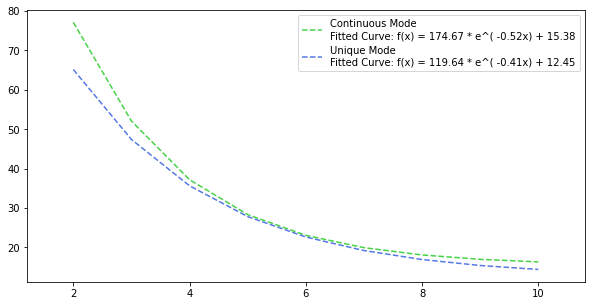

In [9]:
plt.figure(figsize=(10, 5))

x = np.array(continuous_avg.index, dtype=np.float64)
y = np.array(continuous_avg['mission_time'], dtype=np.float64)

min_x = np.min(x)
max_x = np.max(x)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fitted line without outlier
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), color='limegreen', linestyle='--', alpha=0.9,
               label=str("Continuous Mode \nFitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))

x = np.array(unique_avg.index, dtype=np.float64)
y = np.array(unique_avg['mission_time'], dtype=np.float64)
new_x = np.delete(x,2)
new_y = np.delete(y,2)

# Fitted line without outlier
popt2, pcov2 = curve_fit(func, new_x, new_y)
plt.plot(x, func(x, *popt2), color='royalblue', linestyle='--', alpha=0.9,
               label=str("Unique Mode \nFitted Curve: f(x) = "+str(popt2[0].round(2))+' * e^('+' -'+str(popt2[1].round(2))+
                         'x) + '+str(popt2[2].round(2))))

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.legend()

plt.savefig('coverage-comparison-boxplot.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()